# **Step 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# **Step 2: Load the Data**

In [3]:
# Load the dataset
data = pd.read_csv('/content/Advertising.csv')


# Display the first few rows of the dataset

In [4]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# **Step 3: Data Preprocessing**

Inspect the data to ensure there are no missing values.

In [5]:
# Check for null values
print(data.isnull().sum())


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


# **Step 4: Data Exploration**

Visualize relationships between features and the target variable (e.g., Sales)

to see if any strong correlations exist.

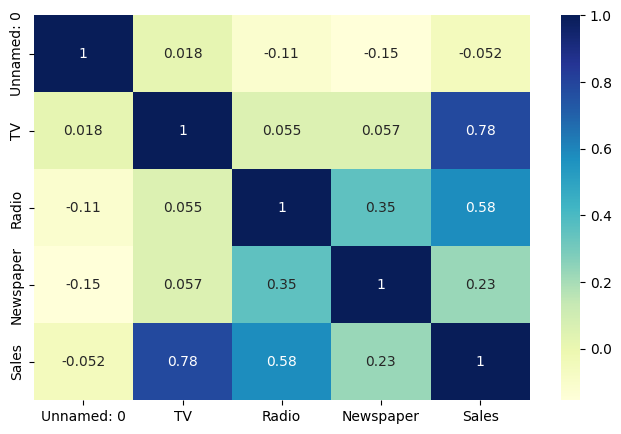

In [6]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()


# **Step 5: Define Features and Target Variable**

We’ll use columns like TV, Radio, and Newspaper as predictors and Sales as the target variable.

In [7]:
# Define features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


# **Step 6: Split Data into Training and Testing Sets**

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 7: Train the Model**

Use Linear Regression to train the model.

In [9]:
# Initialize the model
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

# **Step 8: Make Predictions**

In [10]:
# Predict on the test data
y_pred = model.predict(X_test)


# **Step 9: Evaluate the Model**

Calculate metrics to evaluate the model’s performance.

In [11]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 1.4607567168117603
Mean Squared Error (MSE): 3.1740973539761033
Root Mean Squared Error (RMSE): 1.78159966153345
R-squared (R2): 0.899438024100912


# **Step 10: Visualize Results**

Compare the predicted sales against the actual sales to visualize model performance.

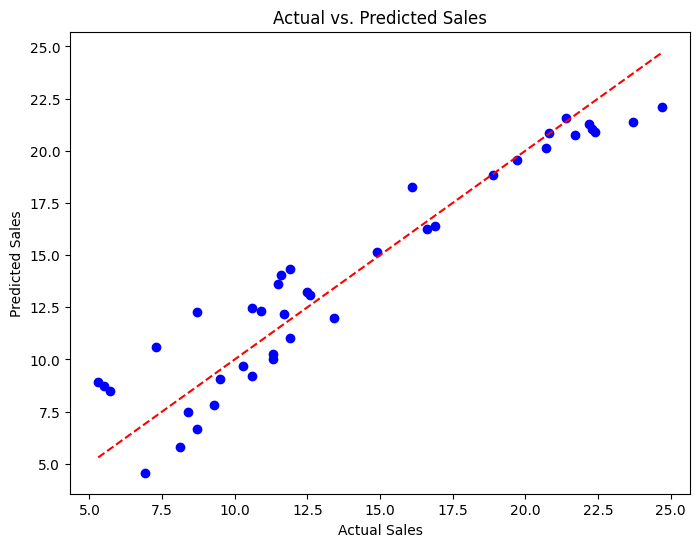

In [12]:
# Plot actual vs. predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()
